In [21]:
pip install qiskit


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import qiskit

In [24]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.23.3', 'qiskit-aer': '0.12.0', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.42.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [25]:
from qiskit import IBMQ

In [26]:
IBMQ.save_account('')

/tmp/ipykernel_3462/3933123782.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('691b4770171e172645199ac45d87f446b5528af263e509c8a4beada26aa31afd58a3fca0bc48fb3406ca7a6a395e5cda2f9741671db2b82757b3f8ebeb18cc22')
configrc.store_credentials:WARNING:2023-04-17 22:58:39,371: Credentials already present. Set overwrite=True to overwrite.


In [27]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

สวัสดีชาวโลก | Hello World

In [28]:
from qiskit import *

In [29]:
qr = QuantumRegister(2)

In [30]:
cr = ClassicalRegister(2)

In [31]:
circuit = QuantumCircuit(qr, cr)

In [32]:
%matplotlib inline

In [33]:
circuit.draw()

q12_0: 
       
q12_1: 
       
 c0: 2/

In [34]:
circuit.h(qr[0])

In [35]:
circuit.draw()

┌───┐
q12_0: ┤ H ├
       └───┘
q12_1: ─────
            
 c0: 2/═════

In [36]:
circuit.cx(qr[0], qr[1])

In [37]:
circuit.draw()

┌───┐     
q12_0: ┤ H ├──■──
       └───┘┌─┴─┐
q12_1: ─────┤ X ├
            └───┘
 c0: 2/══════════

In [38]:
circuit.measure(qr, cr)

In [39]:
circuit.draw()

┌───┐     ┌─┐   
q12_0: ┤ H ├──■──┤M├───
       └───┘┌─┴─┐└╥┘┌─┐
q12_1: ─────┤ X ├─╫─┤M├
            └───┘ ║ └╥┘
 c0: 2/═══════════╩══╩═
                  0  1

In [40]:
simulator = Aer.get_backend('qasm_simulator')

In [41]:
result = execute(circuit, backend= simulator).result()

In [42]:
from qiskit.tools.visualization import plot_histogram

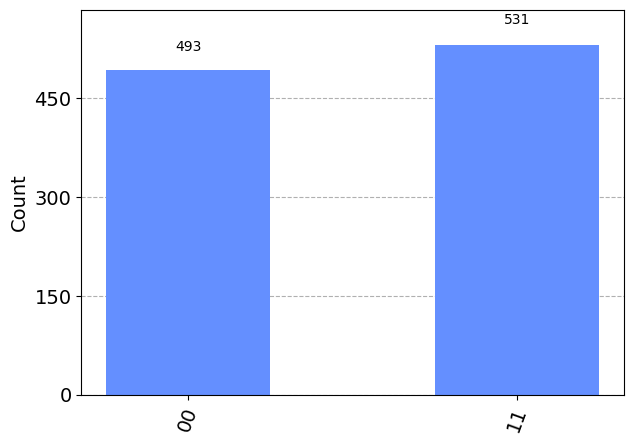

In [43]:
plot_histogram(result.get_counts(circuit))

In [44]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-04-17 22:58:49,395: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [45]:
provider = IBMQ.get_provider('ibm-q')

In [46]:
qcomp = provider.get_backend('simulator_mps') #100 Qubits

In [47]:
job = execute(circuit, backend=qcomp)

In [48]:
from qiskit.tools.monitor import job_monitor

In [49]:
job_monitor(job)

Job Status: job has successfully run


In [50]:
result = job.result()

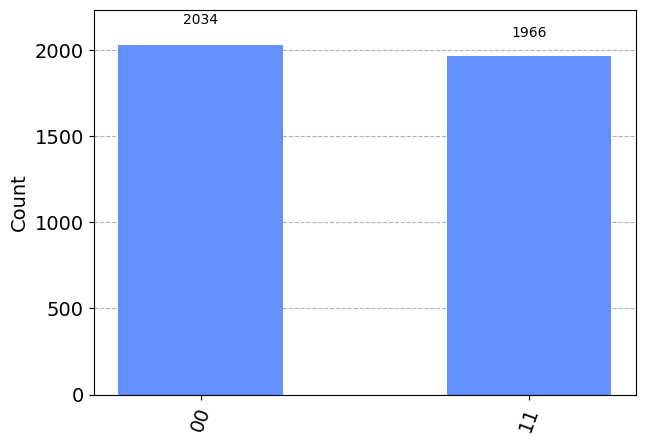

In [51]:
plot_histogram(result.get_counts(circuit))

ลอจิกเกต | Gates

In [52]:
from qiskit import *

In [53]:
from qiskit.tools.visualization import  plot_bloch_multivector

In [54]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend= simulator).result()
statevector = result.get_statevector()
print(statevector)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [55]:
circuit.draw()

┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════

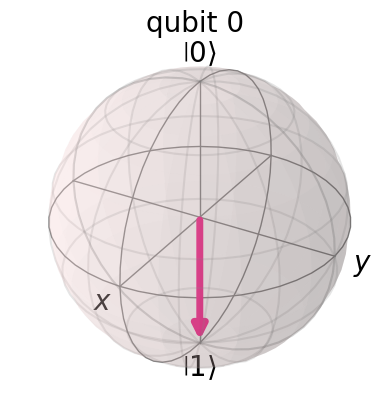

In [56]:
plot_bloch_multivector(statevector)

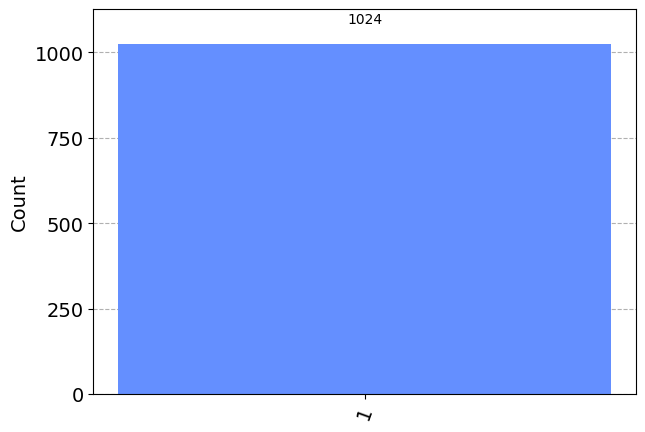

In [57]:
circuit.measure([0], [0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend= backend, shots= 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import  plot_histogram
plot_histogram(counts)

In [58]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend= simulator).result()
unitary = result.get_unitary()
print(unitary)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


เทเลพอร์ต | Teleportation

In [59]:
from qiskit import *

In [60]:
circuit = QuantumCircuit(3, 3)

In [61]:
%matplotlib inline

In [62]:
circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

In [63]:
circuit.x(0)
circuit.barrier()
circuit.draw()

┌───┐ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
c: 3/════════

In [64]:
circuit.h(1)
circuit.cx(1,2)

In [65]:
circuit.draw()

┌───┐ ░           
q_0: ┤ X ├─░───────────
     └───┘ ░ ┌───┐     
q_1: ──────░─┤ H ├──■──
           ░ └───┘┌─┴─┐
q_2: ──────░──────┤ X ├
           ░      └───┘
c: 3/══════════════════

In [66]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw()

┌───┐ ░                ┌───┐
q_0: ┤ X ├─░─────────────■──┤ H ├
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘
q_1: ──────░─┤ H ├──■──┤ X ├─────
           ░ └───┘┌─┴─┐└───┘     
q_2: ──────░──────┤ X ├──────────
           ░      └───┘          
c: 3/════════════════════════════

In [67]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐   
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├───
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘
q_2: ──────░──────┤ X ├───────────░──╫──╫─
           ░      └───┘           ░  ║  ║ 
c: 3/════════════════════════════════╩══╩═
                                     0  1

In [68]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░         
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─
           ░      └───┘           ░  ║  ║  ░ └───┘   
c: 3/════════════════════════════════╩══╩════════════
                                     0  1

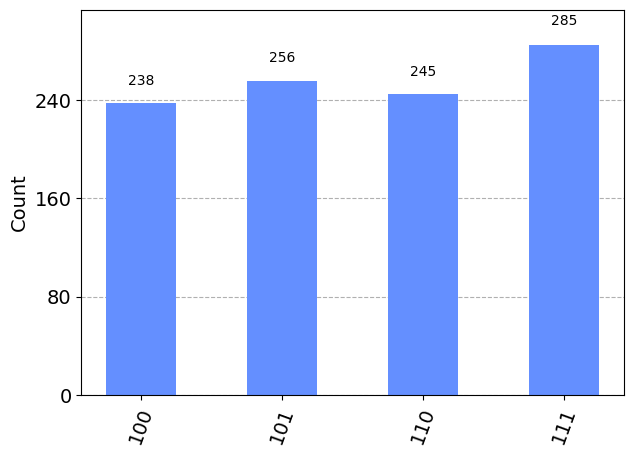

In [69]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [70]:
print(counts)

{'101': 256, '100': 238, '110': 245, '111': 285}


อัลกอริทึม | Bernstein Vazirani

In [71]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [72]:
secretnumber = '111000000001'

In [73]:
#circuit = QuantumCircuit(6+1, 6)
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
#circuit.x(6)
circuit.x(len(secretnumber))
#circuit.h(6)
circuit.h(len(secretnumber))

circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

#circuit.cx(5, 6)
#circuit.cx(3, 6)
#circuit.cx(0, 6)

circuit.barrier()
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.barrier()
#circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

In [74]:
circuit.draw()

┌───┐      ░                      ░ ┌───┐ ░ ┌─┐                        »
 q_0: ┤ H ├──────░───■──────────────────░─┤ H ├─░─┤M├────────────────────────»
      ├───┤      ░   │                  ░ ├───┤ ░ └╥┘┌─┐                     »
 q_1: ┤ H ├──────░───┼──────────────────░─┤ H ├─░──╫─┤M├─────────────────────»
      ├───┤      ░   │                  ░ ├───┤ ░  ║ └╥┘┌─┐                  »
 q_2: ┤ H ├──────░───┼──────────────────░─┤ H ├─░──╫──╫─┤M├──────────────────»
      ├───┤      ░   │                  ░ ├───┤ ░  ║  ║ └╥┘┌─┐               »
 q_3: ┤ H ├──────░───┼──────────────────░─┤ H ├─░──╫──╫──╫─┤M├───────────────»
      ├───┤      ░   │                  ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐            »
 q_4: ┤ H ├──────░───┼──────────────────░─┤ H ├─░──╫──╫──╫──╫─┤M├────────────»
      ├───┤      ░   │                  ░ ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐         »
 q_5: ┤ H ├──────░───┼──────────────────░─┤ H ├─░──╫──╫──╫──╫──╫─┤M├─────────»
      ├───┤      ░   │                  ░ ├───┤ ░  ║  ║  ║  ║  ║ └╥┘┌─┐      »
 q_6: ┤ H ├──────░───┼──────────────────░─┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├──────»
      ├───┤      ░   │                  ░ ├───┤ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   »
 q_7: ┤ H ├──────░───┼──────────────────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├───»
      ├───┤      ░   │                  ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐»
 q_8: ┤ H ├──────░───┼──────────────────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├»
      ├───┤      ░   │                  ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘»
 q_9: ┤ H ├──────░───┼────■─────────────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
      ├───┤      ░   │    │             ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
q_10: ┤ H ├──────░───┼────┼────■────────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
      ├───┤      ░   │    │    │        ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
q_11: ┤ H ├──────░───┼────┼────┼────■───░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
      ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
q_12: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────░──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
      └───┘└───┘ ░ └───┘└───┘└───┘└───┘ ░       ░  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
c: 12/═════════════════════════════════════════════╩══╩══╩══╩══╩══╩══╩══╩══╩═»
                                                   0  1  2  3  4  5  6  7  8 »
«               
« q_0: ─────────
«               
« q_1: ─────────
«               
« q_2: ─────────
«               
« q_3: ─────────
«               
« q_4: ─────────
«               
« q_5: ─────────
«               
« q_6: ─────────
«               
« q_7: ─────────
«               
« q_8: ─────────
«      ┌─┐      
« q_9: ┤M├──────
«      └╥┘┌─┐   
«q_10: ─╫─┤M├───
«       ║ └╥┘┌─┐
«q_11: ─╫──╫─┤M├
«       ║  ║ └╥┘
«q_12: ─╫──╫──╫─
«       ║  ║  ║ 
«c: 12/═╩══╩══╩═
«       9  10 11

In [75]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend= simulator, shots= 1).result()
counts = result.get_counts()
print(counts)

{'111000000001': 1}


Programming on Quantum Computeres

In [76]:
text = "TheCoachingOnline"
binary_strings = []
for char in text:
    ascii_code = ord(char)
    binary_string = bin(ascii_code)[2:].zfill(8)
    binary_strings.append(binary_string)
binary_text = " ".join(binary_strings)
print(binary_text)

01010100 01101000 01100101 01000011 01101111 01100001 01100011 01101000 01101001 01101110 01100111 01001111 01101110 01101100 01101001 01101110 01100101


In [77]:
binary_text = "01010100 01101000 01100101 01000011 01101111 01100001 01100011 01101000 01101001 01101110 01100111 01001111 01101110 01101100 01101001 01101110 01100101"
binary_strings = binary_text.split()
text = ""
for binary_string in binary_strings:
    ascii_code = int(binary_string, 2)
    char = chr(ascii_code)
    text += char
print(text)

TheCoachingOnline


In [78]:
pip install pycryptodome


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [79]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad

# define the key and block size
key = b"MySecretPassword"
block_size = 16

# the plaintext message to be encrypted
plaintext = "Y.Nanthachai!"

# convert the plaintext message to binary string in base 2
binary_text = "".join([format(ord(char), '08b') for char in plaintext])

# pad the binary text to the block size
padded_binary_text = pad(binary_text.encode(), block_size)

# create the AES cipher object
cipher = AES.new(key, AES.MODE_ECB)

# encrypt the padded binary text
encrypted_binary_text = cipher.encrypt(padded_binary_text)

# convert the encrypted binary text to binary string in base 2
encrypted_binary_string = "".join([format(byte, '08b') for byte in encrypted_binary_text])

# the binary string in base 2 that represents the encrypted message
print(encrypted_binary_string)

01011110100010010101111100110100111101001110111111001010100000100010101101100111011100100110001011000110110111101011011110000110111111000010100010101001101010010001101100100111011110110010000001000001110011010111010011011001101001101011000001000000110110011100100111100111011100100010101111011000101000111011011001011110011100000100101101110000100001111101110110000111100001100001011111100111111101101111101001100011100110001111001100110100110000111101101000110010010101100111101001110110111111011010111011000111100001101010111110100101110011100011011100101111111011001001001000001011100100000000001010011011000000011000111110010011001000000000001110000001001001101101111101010101110011010011011001010101000101010001010110111001110101010000101100101000101001101100101111110111011000010000001000000100011000001001110010001010000010100100011100000000101111101001001010010010101111011110001011010111


In [80]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad

# define the key and block size
key = b"MySecretPassword"
block_size = 16

# the binary string in base 2 that represents the encrypted message
encrypted_binary_string = "01011110100010010101111100110100111101001110111111001010100000100010101101100111011100100110001011000110110111101011011110000110111111000010100010101001101010010001101100100111011110110010000001000001110011010111010011011001101001101011000001000000110110011100100111100111011100100010101111011000101000111011011001011110011100000100101101110000100001111101110110000111100001100001011111100111111101101111101001100011100110001111001100110100110000111101101000110010010101100111101001110110111111011010111011000111100001101010111110100101110011100011011100101111111011001001001000001011100100000000001010011011000000011000111110010011001000000000001110000001001001101101111101010101110011010011011001010101000101010001010110111001110101010000101100101000101001101100101111110111011000010000001000000100011000001001110010001010000010100100011100000000101111101001001010010010101111011110001011010111"

# convert the binary string to encrypted binary text
encrypted_binary_text = bytes([int(encrypted_binary_string[i:i+8], 2) for i in range(0, len(encrypted_binary_string), 8)])

# create the AES cipher object
cipher = AES.new(key, AES.MODE_ECB)

# decrypt the encrypted binary text
decrypted_padded_binary_text = cipher.decrypt(encrypted_binary_text)

# remove the padding from the decrypted binary text
decrypted_binary_text = unpad(decrypted_padded_binary_text, block_size)

# convert the decrypted binary text to ASCII text
decrypted_text = "".join([chr(int(decrypted_binary_text[i:i+8], 2)) for i in range(0, len(decrypted_binary_text), 8)])

# the decrypted ASCII text
print(decrypted_text)

Y.Nanthachai!


Mitigating Noise on Real Quantum Computers

In [81]:
from qiskit import *

In [82]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

In [83]:
%matplotlib inline
circuit.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

In [84]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend= simulator, shots=1024).result()

In [85]:
from qiskit.visualization import  plot_histogram

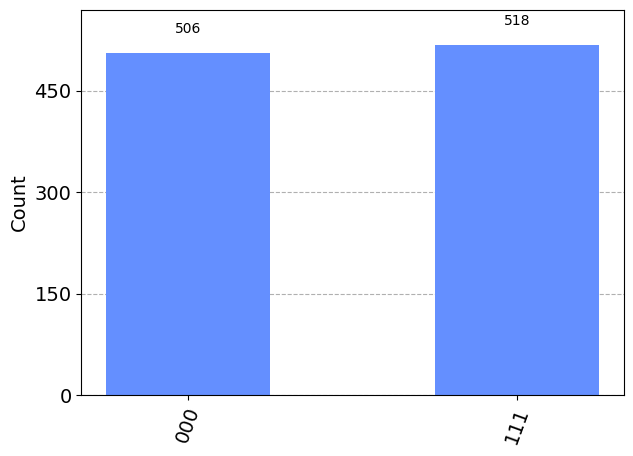

In [86]:
plot_histogram(sim_result.get_counts(circuit))

In [87]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('simulator_stabilizer') #5000 Qubits

ibmqfactory.load_account:WARNING:2023-04-17 22:59:16,275: Credentials are already in use. The existing account in the session will be replaced.


In [88]:
job = execute(circuit, backend= device, shots= 1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

cgusujo43kb0aavn72gg
Job Status: job has successfully run


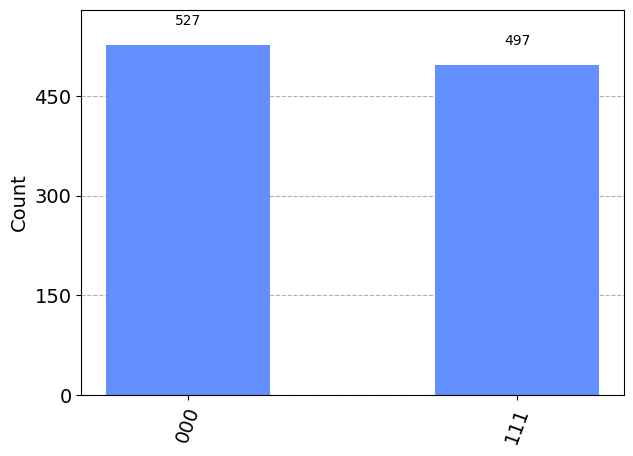

In [89]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [90]:
pip install qiskit.ignis


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [91]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [92]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigetioncal')

In [93]:
cal_circuits[2].draw()

░ ┌─┐      
 q_0: ──────░─┤M├──────
      ┌───┐ ░ └╥┘┌─┐   
 q_1: ┤ X ├─░──╫─┤M├───
      └───┘ ░  ║ └╥┘┌─┐
 q_2: ──────░──╫──╫─┤M├
            ░  ║  ║ └╥┘
c1: 3/═════════╩══╩══╩═
               0  1  2

In [94]:
len(cal_circuits)

8

In [95]:
cal_job = execute(
    cal_circuits,
    backend = device,
    shots = 1024,
    optimization_level = 0
)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

cgusumqj96cmlom8pmn0
Job Status: job has successfully run


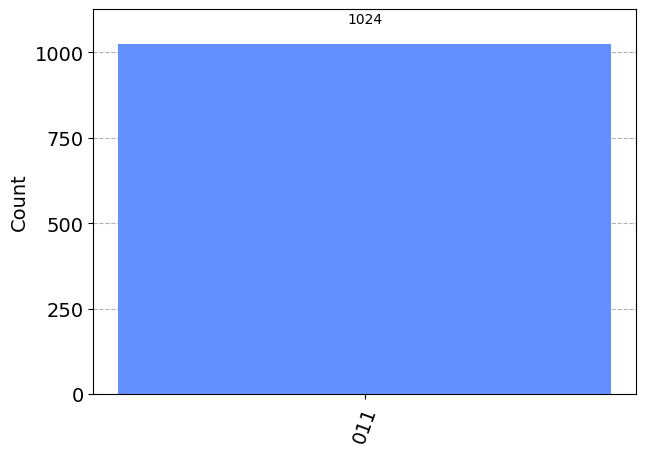

In [96]:
plot_histogram(
    cal_results.get_counts(cal_circuits[3])
)

In [97]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

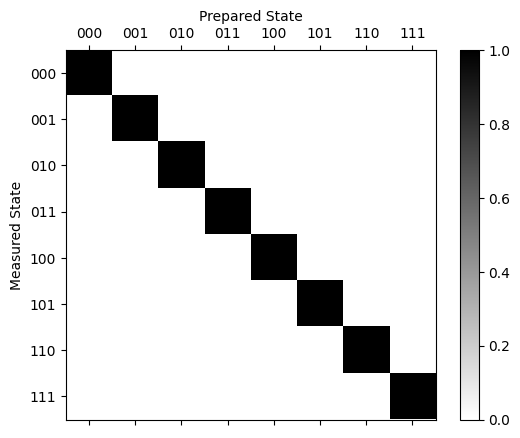

In [98]:
meas_fitter.plot_calibration()

In [99]:
meas_fitter = meas_fitter.filter

In [100]:
#mitigated_result = meas_filter.apply(device_result)

In [101]:
#device_counts = device_result.get_counts(circuit)
#mitigated_counts = mitigated_result.get_counts(circuit)
#plot_histogram([device_counts, mitigated_counts], legend=['device, noisy', 'device, mitigated'])

In [102]:
circuit2 = QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2], [0,1,2])
circuit2.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     ├───┤┌─┴─┐     └╥┘┌─┐   
q_1: ┤ X ├┤ X ├──■───╫─┤M├───
     └───┘└───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

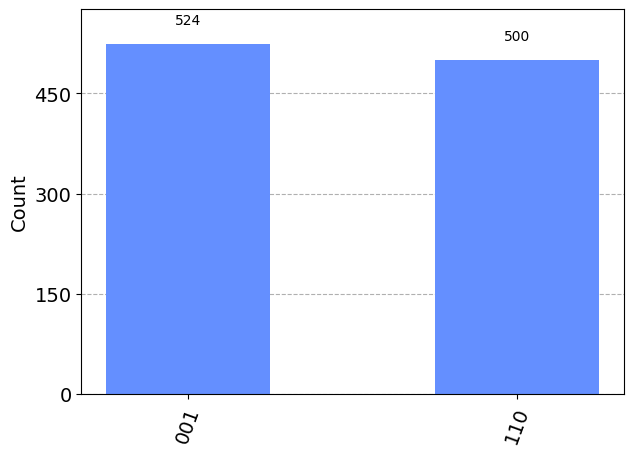

In [103]:
plot_histogram(
    execute(circuit2, backend=simulator, shots=1024).result().get_counts(circuit2)
)

In [104]:
device_counts_2 = execute(circuit2, backend=device, shots=1024).result().get_counts(circuit2)

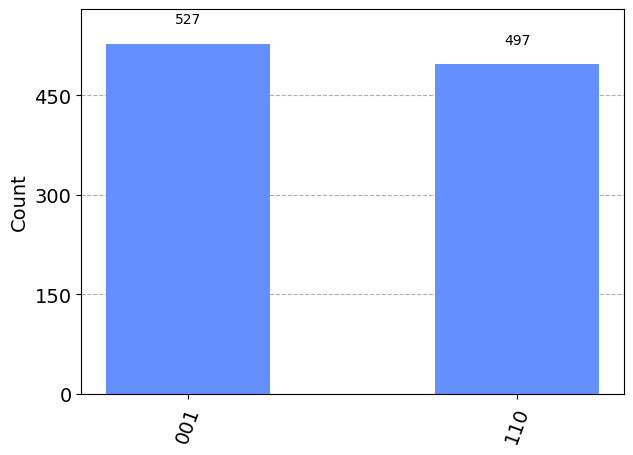

In [105]:
plot_histogram(device_counts_2)

In [106]:
#device_mitigated_counts_2 = meas_filter.apply(device_counts_2)

In [107]:
#plot_histogram(device_mitigated_counts_2)

Quantum Games

In [108]:
#git clone https://github.com/JavaFXpert/QiskitBlocks.git

Quantum Algorithms

In [109]:
import qiskit.quantum_info as qi
from qiskit.circuit.library import FourierChecking
from qiskit.visualization import plot_histogram

In [110]:
f=[1,-1,-1,-1]
g=[1,1,-1,-1]

In [111]:
circ = FourierChecking(f=f,g=g)
circ.draw()

┌──────────────────────────────────────┐
q_0: ┤0                                     ├
     │  fc: [1, -1, -1, -1], [1, 1, -1, -1] │
q_1: ┤1                                     ├
     └──────────────────────────────────────┘

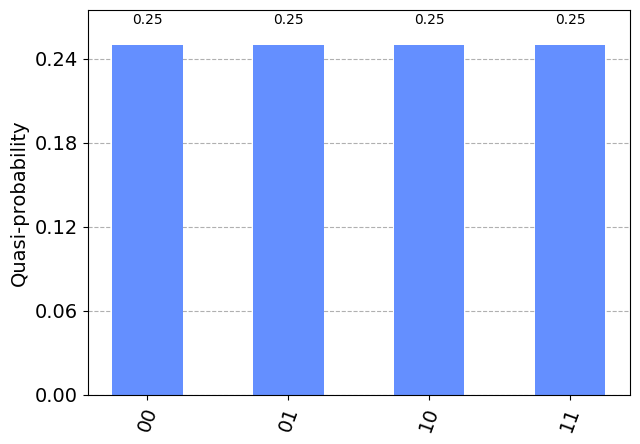

In [112]:
zero = qi.Statevector.from_label('00')
sv = zero.evolve(circ)
probs = sv.probabilities_dict()
plot_histogram(probs)